In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

In [4]:
# get the DPCA dtrajs, mapped to the rama states
dtraj_full_CG = np.load('./dtraj_DPCA_mpp.npy')
dtraj_full_CG = [ dtraj for dtraj in dtraj_full_CG ]

In [5]:
# ITS test for the CG model
lags = np.linspace(1,200,50).astype(int)
its_CG = msm.timescales_msm(dtraj_full_CG, lags=lags)

In [8]:
# choose tau
tau_CG = 1


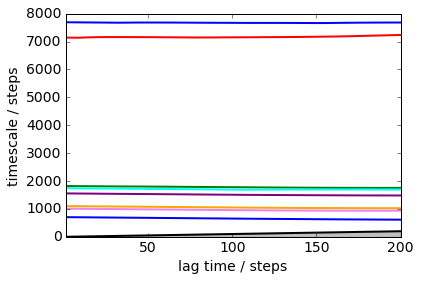

In [9]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its_CG, ylog=False, units='steps', linewidth=2)
plt.plot(tau_CG*np.ones(5),(its_CG.timescales[-1][0])*np.arange(5)/5.)
#xlim(0, 1100); ylim(0, 2500);

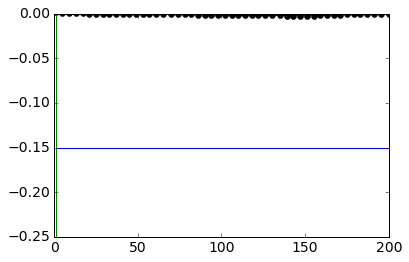

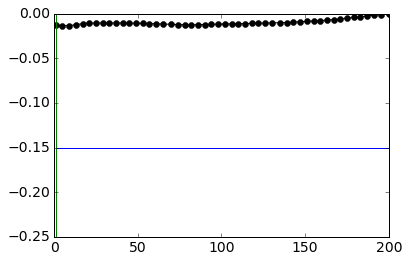

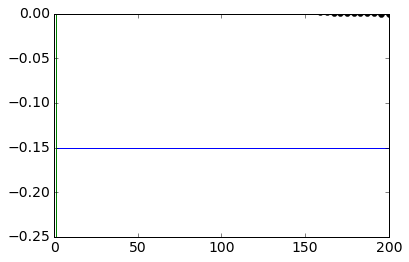

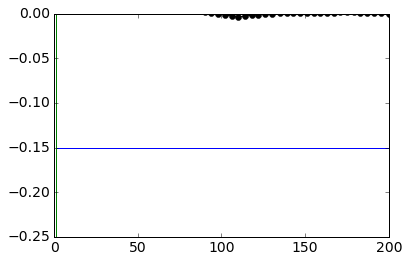

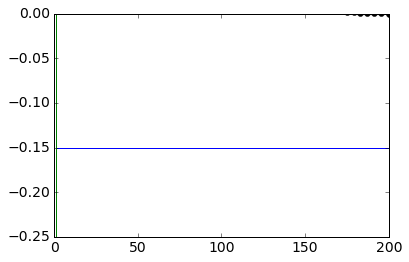

In [10]:
# also measure the relative error compared to the converged value
N_ts = 5
tau_check = tau_CG
tol_check = 0.15
for ind in range(N_ts):
    ts = its_CG.timescales[:,ind]
    plt.plot(lags,(ts-ts[-1])/ts[-1],marker='o',color='k')
    plt.plot(lags,-tol_check*np.ones(len(lags)))
    plt.plot(tau_check*np.ones(len(lags)), 0.05*np.arange(len(lags))-0.25)
    plt.ylim([-0.25,0])
    plt.show()

In [11]:
# choose tau and make the model
mle_CG = msm.bayesian_markov_model(dtraj_full_CG,tau_CG,nsamples=100)

In [12]:
# choose tau and make the model
np.save('T_mle_mpp',mle_CG.transition_matrix)
np.savetxt('tau_CG_mpp.dat',[tau_CG])